Data source -> https://www.kaggle.com/datasets/justinas/nba-players-data/data

In [115]:
# access data
import pandas as pd

# Since the file is in this project we can use a relative path 
file_path = 'data/all_seasons.csv'

df = pd.read_csv(file_path)

# display df to see what we are working with
df


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [116]:
# Import additional libraries for data analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration 
Time to see what our data looks like

In [117]:
# Let's get an idea of the number of rows and columns the dataset has
df.shape

(12844, 22)

In [118]:
# Now lets check data types and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

Looking at the above output, we can see that many columns in our dataset are of type 
object. To do any meaningful analysis we will need to clean this up and convert these 
columns to a number type. 

## Data Cleaning

In [125]:
# Before doing any cleaning I like to have a copy of original df in case I need it for any reason

original_data = df.copy()
original_data

0         94.800728
1         86.182480
2        103.418976
3        102.058200
4        119.748288
            ...    
12839    127.005760
12840     86.182480
12841    102.511792
12842    113.398000
12843    102.965384
Name: player_weight, Length: 12844, dtype: float64

In [120]:
# Now lets check to see if there are any duplicate rows

has_duplicates = df.duplicated().any()

if has_duplicates:
    print("There are duplicate rows in the DataFrame.")
else:
    print("No duplicate rows found in the DataFrame.")

No duplicate rows found in the DataFrame.


In [121]:
# Earlier I saw a column that was redundant. 
# This removes the column we don't need for our analysis 

df = df.drop(columns ='Unnamed: 0')


In [122]:
# Let's confirming 'Unnamed: 0' column actually got dropped
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


Perfect. Time to move on. 

In [123]:
# Now I am checking to see if there are any missing values in each column
df.isnull().sum()

player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

It appears that most of our dataset is not null, with the exception of the College column. This could indicate that there are NBA players that either didn't go to school or just has missing data. 

In [129]:

# Converting player_weight to be in lbs instead of kg
# Only run this cell once or else the weight will continue to get multiplied. 

df['player_weight_lbs'] = df['player_weight_lbs'] * 2.20462
df['player_weight_lbs'] = df['player_weight_lbs'].round(2)


In [127]:
# Since I converted the weight from kg to lbs I renamed the columns for accuracy.

df = df.rename(columns={
    'player_height':'player_height_cm', 
    'player_weight':'player_weight_lbs', 
    'gp':'games_played'})

In [131]:
# Let's confirm the conversion and column rename
df[['player_weight_lbs']]

,player_weight_lbs
0,209.0
1,190.0
2,228.0
3,225.0
4,264.0
...,...
12839,280.0
12840,190.0
12841,226.0
12842,250.0


Great! Now let's move on.

Great, the column rename worked. 

In [132]:
# Earlier we saw that several columns were of type object. Let's convert those to a number type

df['draft_year'] = df['draft_year'].replace('Undrafted', np.nan)
df['draft_year'] = pd.to_numeric(df['draft_year'])

df['draft_round'] = df['draft_round'].replace('Undrafted', np.nan)
df['draft_round'] = pd.to_numeric(df['draft_round'])

df['draft_number'] = df['draft_number'].replace('Undrafted', np.nan)
df['draft_number'] = pd.to_numeric(df['draft_number'])

In [134]:
# Now let's confirm the conversion actually happened
df[['draft_year','draft_round','draft_number']].dtypes

draft_year      float64
draft_round     float64
draft_number    float64
dtype: object

Excellent! The conversion worked. Now our data is in a format where we can run some analysis. 

In [ ]:
'''
This code block defines a helper function that attempts to convert any non-numeric column 
in the df to numeric type, and non-convertible strings to NaN.
'''

def object_to_number_conversion(df):
    for column in df.columns:
        # Check if the column type is object (string)
        if df[column].dtype == 'object':
            # Attempt to convert the column to numeric type, forcing non-convertible strings to NaN
            df[column] = pd.to_numeric(df[column], errors='coerce')
    return df


In [135]:
# Double check that the columns got converted to a numeric datatype
df.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height_cm     float64
player_weight_lbs    float64
college               object
country               object
draft_year           float64
draft_round          float64
draft_number         float64
games_played           int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [136]:
'''

df['season'] is an Object datatype which isn't very useful.
I will duplicate the column and create a categories datatype and a period datatype
Categorical and Period datatypes each have their own benefits for analysis which is why I am doing this.
ChatGPT wrote this code.
'''

# Step 1: The original 'season' column remains unchanged.

# Step 2: Duplicate the 'season' column as categorical datatype
df['season_categorical'] = df['season'].astype('category')

# Step 3: Duplicate the 'season' column as period datatype
    # Convert the season to a period datatype, assuming the format is 'YYYY-YY' and using the starting year.
    # Note: Pandas Periods require a specific frequency, so we'll use 'A' (annual) frequency here,
    # assuming the season roughly corresponds to a single year.
df['season_period'] = df['season'].apply(lambda x: pd.Period(x.split('-')[0], 'A'))

# Display the data types of the new columns to verify
df.dtypes[['season', 'season_categorical', 'season_period']]


season                       object
season_categorical         category
season_period         period[A-DEC]
dtype: object

In [143]:
# Since this dataset is large, I have decided to focus on just the 2021-22 season
# I am saving the filtered Dataframe in a new df called df_2021-22

df_2021_22 = df[df['season'] == '2021-22']
df_2021_22

,player_name,team_abbreviation,age,player_height_cm,player_weight_lbs,college,country,draft_year,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,season_categorical,season_period
11700,Usman Garuba,HOU,20.0,203.20,229.0,NaN,Spain,2021.0,1.0,23.0,...,0.7,7.0,0.083,0.263,0.091,0.510,0.084,2021-22,2021-22,2021
11701,Vlatko Cancar,DEN,25.0,203.20,236.0,NaN,Slovenia,2017.0,2.0,49.0,...,1.1,0.8,0.041,0.133,0.131,0.657,0.139,2021-22,2021-22,2021
11702,Vit Krejci,OKC,22.0,203.20,195.0,NaN,Czech Republic,2020.0,2.0,37.0,...,1.9,-12.8,0.024,0.121,0.125,0.529,0.117,2021-22,2021-22,2021
11703,Victor Oladipo,MIA,30.0,193.04,213.0,Indiana,USA,2013.0,1.0,2.0,...,3.5,-1.4,0.017,0.110,0.247,0.608,0.277,2021-22,2021-22,2021
11704,Vernon Carey Jr.,WAS,21.0,205.74,270.0,Duke,USA,2020.0,2.0,32.0,...,0.0,-47.6,0.145,0.093,0.179,0.534,0.000,2021-22,2021-22,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,Tobias Harris,PHI,29.0,200.66,226.0,Tennessee,USA,2011.0,1.0,19.0,...,3.5,3.2,0.032,0.164,0.214,0.566,0.158,2021-22,2021-22,2021
12301,Tomas Satoransky,WAS,30.0,200.66,210.0,NaN,Czech Republic,2012.0,2.0,32.0,...,3.3,-8.0,0.029,0.110,0.124,0.461,0.285,2021-22,2021-22,2021
12302,Tony Bradley,CHI,24.0,208.28,248.0,North Carolina,USA,2017.0,1.0,28.0,...,0.5,5.2,0.123,0.196,0.128,0.600,0.065,2021-22,2021-22,2021
12303,Tony Snell,NOP,30.0,198.12,213.0,New Mexico,USA,2013.0,1.0,20.0,...,0.5,-7.8,0.018,0.107,0.099,0.541,0.047,2021-22,2021-22,2021


In [ ]:
# Export of the cleaned up df so that anyone can access when downloading this notebook

df_2021_22.to_csv('data/nba_season_2021_2022.csv')

## Data Analysis
Now that our data is cleaned and filtered down, lets do some actual analysis

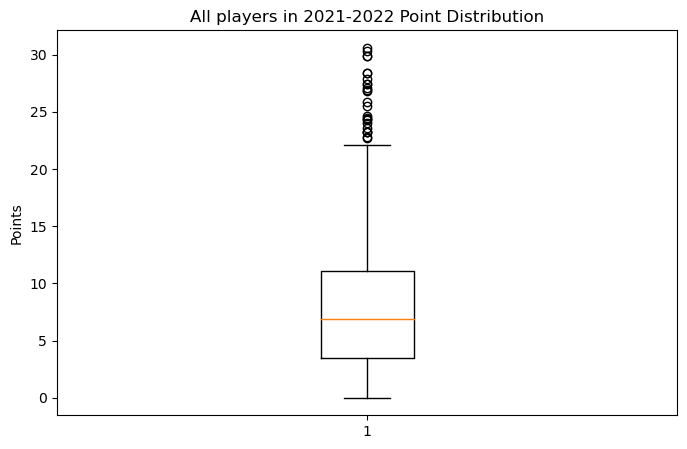

In [148]:
# Let's start with seeing the distribution of the average amount of points scored 

plt.figure(figsize=(8, 5))
plt.boxplot(df_2021_22.pts)
plt.title('All players in 2021-2022 Point Distribution')
plt.ylabel('Points')
plt.show()


### Boxplot interpretation: 
This boxpplot represents the average number of points scored by all players in the dataset in the 2021-2022 NBA season.

**Central Tendency**:
   - The horizontal line inside the box represents the median average points scored by a player. This value divides the player scoring distribution into two equal halves. It appears to be around the 10-point mark, suggesting that the typical player averaged about 10 points per game.

**Variability**:
   - The box itself shows the interquartile range (IQR), which contains the middle 50% of the players' average points. The IQR extends from about 5 points to roughly 15 points, indicating that most players scored within this range on average.
   - The length of the box indicates the spread of the central 50% of the data. A larger box would indicate greater variability among players' average scores.

**Whiskers**:
   - The top whisker extends from the third quartile to the highest average points scored within 1.5 times the IQR from the third quartile. It seems to reach around 25 points, suggesting some players averaged up to this amount without being considered outliers.
   - The bottom whisker extends from the first quartile down to the lowest average points scored within 1.5 times the IQR from the first quartile. It seems to start around the zero mark, which would make sense as it's not possible to score fewer than zero points.

**Outliers**:
   - The individual points above the top whisker represent outliers. These are players who averaged a number of points that is exceptionally high compared to the rest of the league. Their scoring averages are outside the typical range for NBA players during the 2021-2022 season.
   - The presence of multiple outliers suggests that there are quite a few players who significantly outperformed the average scoring rate.

**Overall Distribution**:
   - The distribution of players' average scores is skewed to the right, with more players scoring below the median than above it, but with a tail extending towards higher scores due to outliers.
   - This right skew suggests that while the majority of players score on the lower end, there is a significant number of high-performing individuals who push the average up with much higher scoring.

While the typical player scored around 10 points per game, there is a wide range of scoring performances, with a notable group of high-scoring players far exceeding the average of most of their peers.

### Expanding the Boxplot (by team)
The above boxplot is useful to get an idea of the average point distribution for all the players, however, let's zoom in and see it from each team's prospective. 

Here are some of the changes made: 
- Team abbreviations for each box plot
- Color palette
- Axes descriptions
- Boxplot title

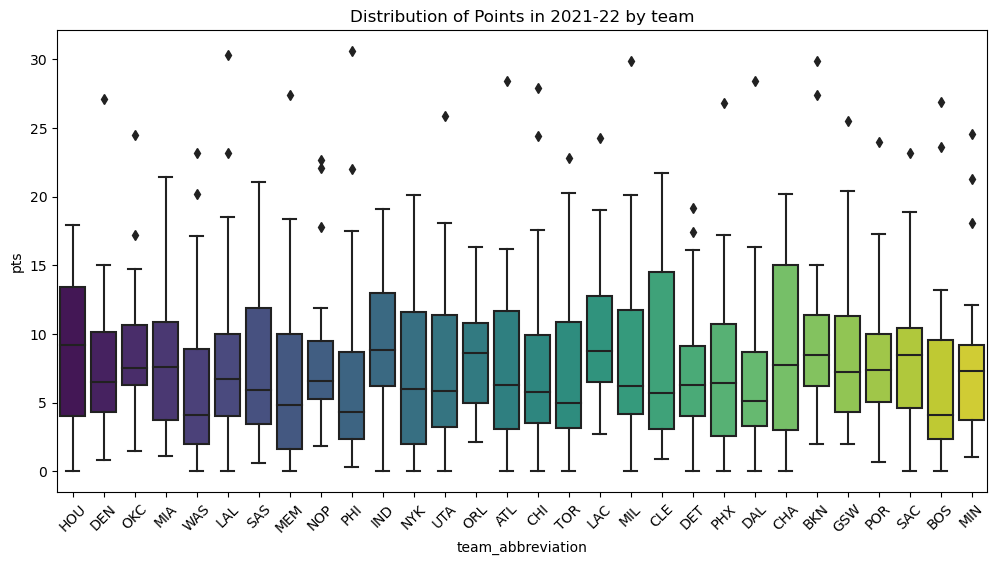

In [149]:
# Updated boxplot that shows point distribution by team

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_2021_22, 
    x = 'team_abbreviation',
    y = 'pts', 
    palette='viridis')  # Using a nice color palette
plt.xticks(rotation=45)
plt.title("Distribution of Points in 2021-22 by team") 
plt.show()


### Updated boxplot interpretation

The provided boxplot represents point distributions for NBA teams in the 2021-22 season:

**Medians** 
Medians are consistent across teams, suggesting similar scoring performance league-wide.

**IQRs** 
The IQR show variability in game-to-game scoring, with some teams demonstrating greater consistency than others.

**Whiskers** 
The Whiskers indicate the typical range of scores; longer whiskers suggest a broader scoring range within the season.

**Outliers**, 
There are outliers mostly above the upper whisker, which point to frequent high-scoring games across many teams, with fewer instances of unusually low scores.

Overall, there's noticeable variability in scoring patterns between teams, reflecting differing offensive dynamics and game circumstances.

In [ ]:
# Now lets do a histogram
plt.figure(figsize=(8,5))
plt.hist(df_2021_22.pts)
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('2021-22 Points Distribution')
plt.show()

In [ ]:
# Plotting Kernel density plot for another perspective on the distribution of pts data

sns.kdeplot(data=df_2021_22, x="pts", fill=True)  # Add 'fill=True' for filled area
plt.xlabel('Points Scored')
plt.ylabel('Density')
plt.title('Density Plot of Points Distribution')
plt.show()

In [ ]:
#df_2021_22.info()
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.info()


In [ ]:
# Adding correlation plot
# -1 = negative correlation (red)
# 1 = positive correlation (blue)

plt.figure(figsize=(10, 10)) # increased plot size for better visibility 
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1) 
plt.show()

## Exploring Relationships Between Columns


### Player Height vs. Points Scored (Numerical to Numerical Analysis)

In [ ]:
# Exploring Relationships Between Columns
'''
I am curious to see relationship between player height and
points scored using a scatter plot and calculating the Pearson correlation coefficient.

'''
# Player Height vs. Points Scored (Numerical to Numerical Analysis)

# Calculating Pearson correlation coefficient between 'player_height_cm' and 'pts'
correlation_height_pts = df_2021_22['player_height_cm'].corr(df_2021_22['pts'])
correlation_height_pts

In [ ]:
# The correlation coefficient suggests that there is no strong correlation between 
# player_heights and pts

In [ ]:
# Now lets create a scatter plot to visualize the relationship between player height and points scored
plt.figure(figsize=(8, 5))
plt.scatter(df_2021_22['player_height_cm'], df_2021_22['pts'], alpha=0.2)
plt.title('Player Height vs. Points Scored (2021-22 Season)')
plt.xlabel('Player Height (cm)')
plt.ylabel('Points Scored')
plt.grid(True)
plt.show()

print("Correlation coefficient:", correlation_height_pts)

## Calculating average points scored by draft round


In [ ]:
# I still need to research this code to understand how and what it does

# Calculating average points scored by draft round
avg_pts_by_draft_round = df_2021_22.groupby('draft_round')['pts'].mean().reset_index()

# Creating a bar chart to visualize the average points scored by draft round
plt.figure(figsize=(8, 5))
plt.bar(avg_pts_by_draft_round['draft_round'].astype(str), avg_pts_by_draft_round['pts'], color='skyblue')
plt.title('Average Points Scored by Draft Round (2021-22 Season)')
plt.xlabel('Draft Round')
plt.ylabel('Average Points Scored')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Display the average points scored by draft round
print(avg_pts_by_draft_round)